In [14]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from fields_propagation.fourier_filter import fourier_filter
from holograms.dmd_holograms import parallel_lee,  orthogonal_lee, holo_SP, holo_Haskell
from holograms.generate_LUT import generate_lut

from plotting.plot_funs import colorize
from plotting.specialized_functions import plot_holoWzoom, plot_four, \
    add_linesNcircs, plot_amp_phase_proj

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 

plt.rcParams.update({"figure.facecolor" : "white"})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Quantization of complex values

(-0.5, 779.5, 779.5, -0.5)

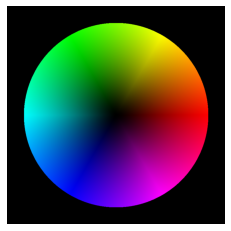

In [15]:
nx = 780 ; ny = 780
X,Y = np.meshgrid(np.arange(nx)-nx/2,np.arange(ny)-ny/2)
rad_vort = 330
X /= rad_vort
Y /= rad_vort
sc = 2*rad_vort/nx
vortex_disk = (X-1j*Y)*(X**2+Y**2<1**2)
vortex_disk /= np.max(np.abs(vortex_disk))
plt.imshow(colorize(vortex_disk))
plt.gca().axis('off')

## 1. Aligned holograms ($p_y = 0$)

### $p_x=3$


First we define the parameters for the holograms

In [16]:
px = 3
nuvec = np.array((1/px,0)) 
SA_filter = 1.0*np.linalg.norm(nuvec)/4

Then we compute the holograms, note that for the Haskell we first need to compute the LUT

In [17]:
f_val_hask, px_comb_hask, lut_hask = generate_lut('haskell', px)

holo_list = [parallel_lee(vortex_disk, nuvec=nuvec), 
                 orthogonal_lee(vortex_disk, nuvec=nuvec), 
                 holo_Haskell(vortex_disk, lut_hask, px_comb_hask)]

Finally, we compute the shaped fields

In [18]:
shaped_fields = []
ft_holos = []
for ho in holo_list:
    filtered_field, ft_mask = fourier_filter(ho, nuvec, SA_filter, get_ft=True)
    shaped_fields += [filtered_field] 
    ft_holos+= [ft_mask]

Then we plot the results

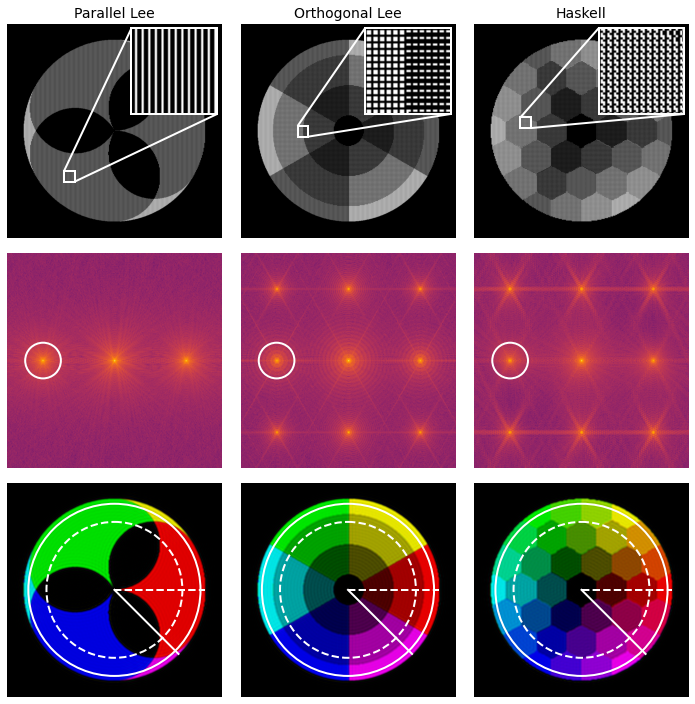

In [19]:
angs = [0,np.pi/4]
rads = np.array([0.75,0.95]) 
titles = ['Parallel Lee', 'Orthogonal Lee', 'Haskell']
zpos_list = [[0.29,0.71],[0.29,0.5],[0.24,0.46]]

fig, axs = plt.subplots(3,3, figsize=(10,10))
for i in range(len(holo_list)):
    axs[0,i].set_title(titles[i])
    plot_holoWzoom(holo_list[i],ax=axs[0,i], rz=0.025,xyzoom=zpos_list[i])
    plot_four(ft_holos[i], ax= axs[1,i], ap_loc=nuvec, ap_rad=SA_filter)
    axs[2,i].imshow(colorize(shaped_fields[i]))
    axs[2,i].axis('off')
    
    add_linesNcircs(shaped_fields[i].shape, angs=angs, rads=rads, ax=axs[2,i], sc=sc)

fig.tight_layout()

We can also plot the projection along the circles and lines

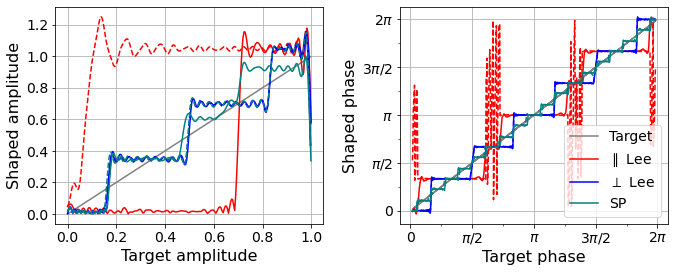

In [20]:
plot_amp_phase_proj(X, Y, vortex_disk, shaped_fields, angs, rads)

### $p_x=4$


First we define the parameters for the holograms

In [9]:
px = 4
nuvec = np.array((1/px,0)) 
SA_filter = 1.0*np.linalg.norm(nuvec)/4

Then we compute the holograms, note that for the Haskell we first need to compute the LUT

In [10]:
f_val_hask, px_comb_hask, lut_hask = generate_lut('haskell', px)

holo_list = [parallel_lee(vortex_disk, nuvec=nuvec), 
                 orthogonal_lee(vortex_disk, nuvec=nuvec), 
                 holo_Haskell(vortex_disk, lut_hask, px_comb_hask)]

Finally, we compute the shaped fields

In [11]:
shaped_fields = []
ft_holos = []
for ho in holo_list:
    filtered_field, ft_mask = fourier_filter(ho, nuvec, SA_filter, get_ft=True)
    shaped_fields += [filtered_field] 
    ft_holos+= [ft_mask]

Then we plot the results

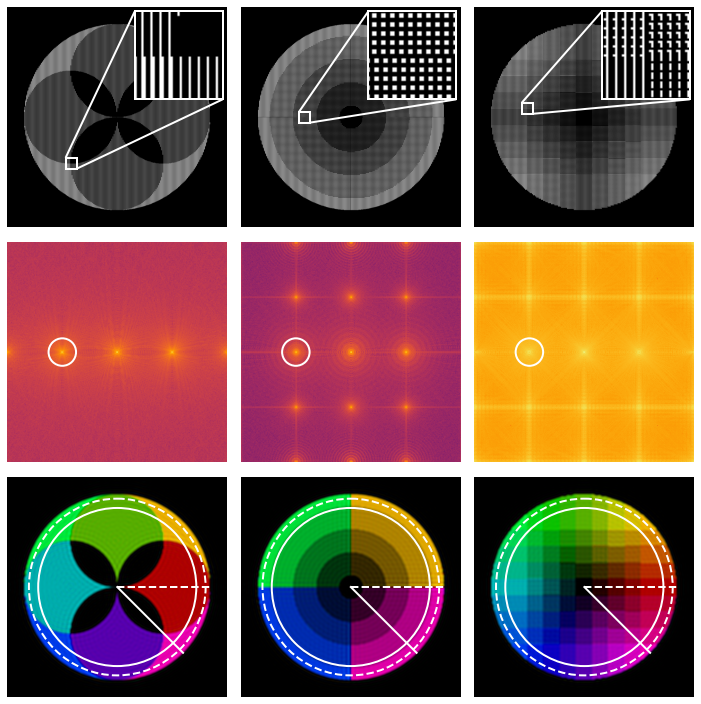

In [12]:
angs = [0,np.pi/4]
rads = np.array([0.95,.85])

titles = ['Parallel Lee', 'Orthogonal Lee', 'Haskell']
zpos_list = [[0.29,0.71],[0.29,0.5],[0.24,0.46]]

fig, axs = plt.subplots(3,3, figsize=(10,10))
for i in range(len(holo_list)):
    axs[0,i].set_title(titles[i])
    plot_holoWzoom(holo_list[i],ax=axs[0,i], rz=0.025,xyzoom=zpos_list[i])
    plot_four(ft_holos[i], ax= axs[1,i], ap_loc=nuvec, ap_rad=SA_filter)
    axs[2,i].imshow(colorize(shaped_fields[i]))
    axs[2,i].axis('off')
    
    add_linesNcircs(shaped_fields[i].shape, angs=angs, rads=rads, ax=axs[2,i],sc=sc)

fig.tight_layout()

We can also plot the projection along the circles and lines

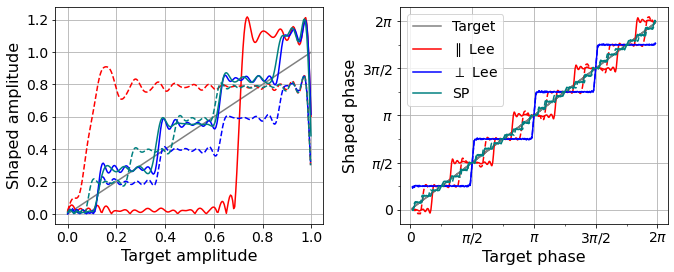

In [13]:
plot_amp_phase_proj(X, Y, vortex_disk, shaped_fields, angs, rads)

## 2. Tilted holograms at 45 degrees ($p_y = p_x$)

### $p_x=3$


First we define the parameters for the holograms

In [132]:
px = 3
nuvec = np.array((1/px,1/px)) 
SA_filter = 1.0*np.linalg.norm(nuvec)/4

Then we compute the holograms, note that for the Haskell we first need to compute the LUT

In [133]:
f_val_hask, px_comb_hask, lut_hask = generate_lut('haskell45', px)

holo_list = [parallel_lee(vortex_disk, nuvec=nuvec), 
                 orthogonal_lee(vortex_disk, nuvec=nuvec), 
                 holo_Haskell(vortex_disk, lut_hask, px_comb_hask)]

Finally, we compute the shaped fields

In [134]:
shaped_fields = []
ft_holos = []
for ho in holo_list:
    filtered_field, ft_mask = fourier_filter(ho, nuvec, SA_filter, get_ft=True)
    shaped_fields += [filtered_field] 
    ft_holos+= [ft_mask]

Then we plot the results

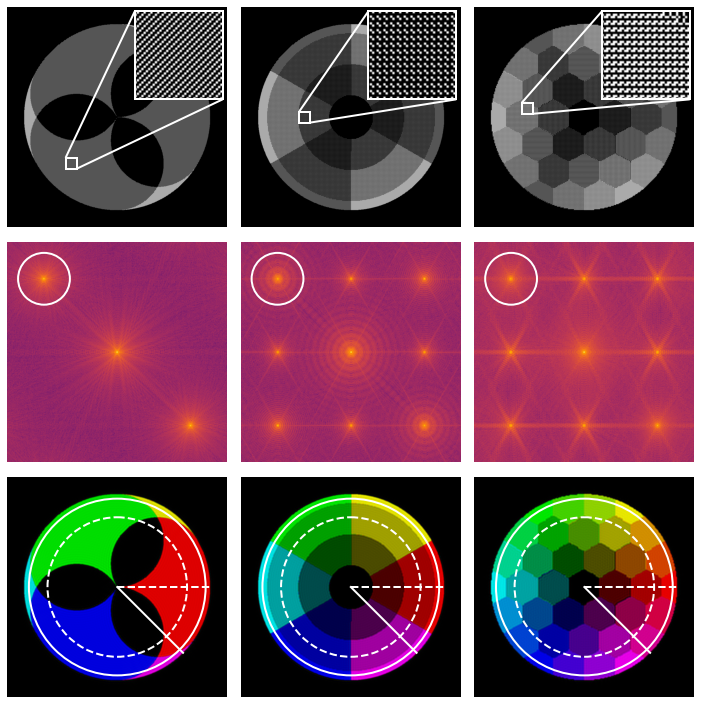

In [135]:
angs = [0,np.pi/4]
rads = np.array([0.75,0.95]) 

titles = ['Parallel Lee', 'Orthogonal Lee', 'Haskell 45']
zpos_list = [[0.29,0.71],[0.29,0.5],[0.24,0.46]]

fig, axs = plt.subplots(3,3, figsize=(10,10))
for i in range(len(holo_list)):
    axs[0,i].set_title(titles[i])
    plot_holoWzoom(holo_list[i],ax=axs[0,i], rz=0.025,xyzoom=zpos_list[i])
    plot_four(ft_holos[i], ax= axs[1,i], ap_loc=nuvec, ap_rad=SA_filter)
    axs[2,i].imshow(colorize(shaped_fields[i]))
    axs[2,i].axis('off')
    
    add_linesNcircs(shaped_fields[i].shape, angs=angs, rads=rads, ax=axs[2,i], sc=sc)

fig.tight_layout()

We can also plot the projection along the circles and lines

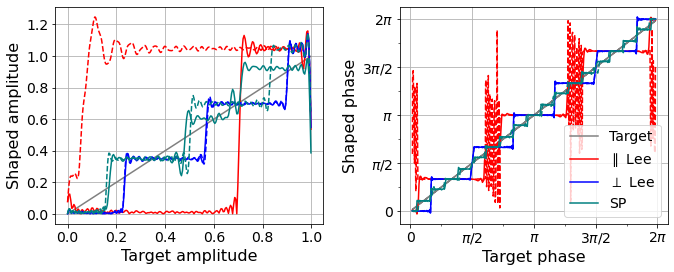

In [136]:
plot_amp_phase_proj(X, Y, vortex_disk, shaped_fields, angs, rads)

### $p_x=4$


First we define the parameters for the holograms

In [137]:
px = 4
nuvec = np.array((1/px,1/px)) 
SA_filter = 1.0*np.linalg.norm(nuvec)/4

Then we compute the holograms, note that for the Haskell we first need to compute the LUT

In [139]:
f_val_hask, px_comb_hask, lut_hask = generate_lut('haskell45', px)

holo_list = [parallel_lee(vortex_disk, nuvec=nuvec), 
                 orthogonal_lee(vortex_disk, nuvec=nuvec), 
                 holo_Haskell(vortex_disk, lut_hask, px_comb_hask)]

Finally, we compute the shaped fields

In [140]:
shaped_fields = []
ft_holos = []
for ho in holo_list:
    filtered_field, ft_mask = fourier_filter(ho, nuvec, SA_filter, get_ft=True)
    shaped_fields += [filtered_field] 
    ft_holos+= [ft_mask]

Then we plot the results

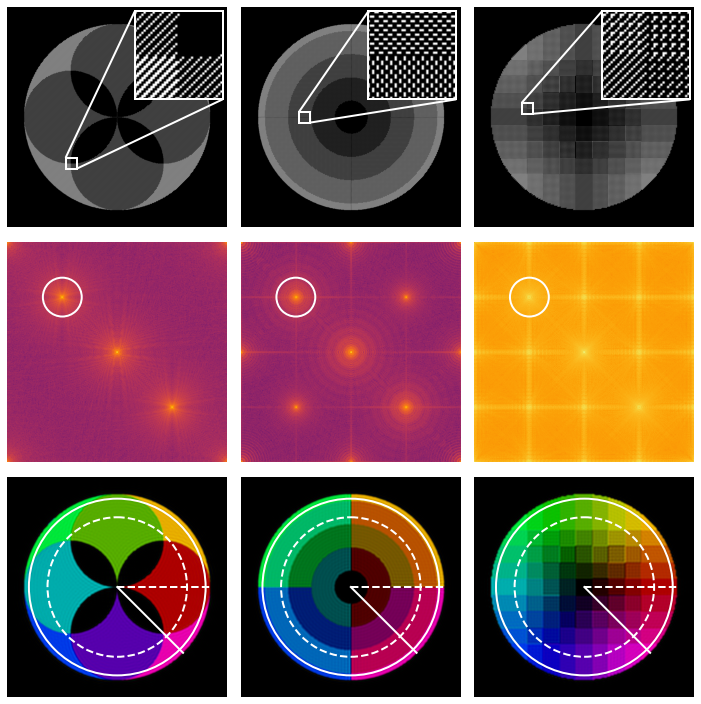

In [141]:
angs = [0,np.pi/4]
rads = np.array([0.75,0.95]) 


titles = ['Parallel Lee', 'Orthogonal Lee', 'Haskell 45']
zpos_list = [[0.29,0.71],[0.29,0.5],[0.24,0.46]]

fig, axs = plt.subplots(3,3, figsize=(10,10))
for i in range(len(holo_list)):
    axs[0,i].set_title(titles[i])
    plot_holoWzoom(holo_list[i],ax=axs[0,i], rz=0.025,xyzoom=zpos_list[i])
    plot_four(ft_holos[i], ax= axs[1,i], ap_loc=nuvec, ap_rad=SA_filter)
    axs[2,i].imshow(colorize(shaped_fields[i]))
    axs[2,i].axis('off')
    
    add_linesNcircs(shaped_fields[i].shape, angs=angs, rads=rads, ax=axs[2,i], sc=sc)

fig.tight_layout()

We can also plot the projection along the circles and lines

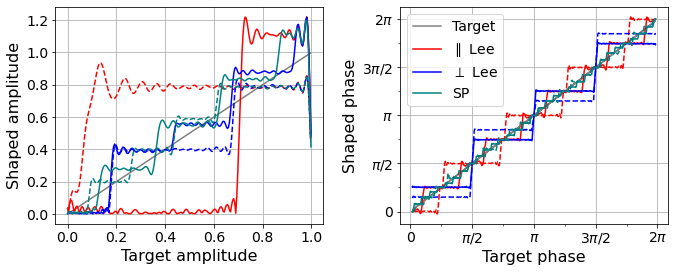

In [142]:
plot_amp_phase_proj(X, Y, vortex_disk, shaped_fields, angs, rads)

## 3. Optimally tilted holograms ($p_y = p_x^2$)

### $p_x=3$


First we define the parameters for the holograms

In [143]:
px = 3
nuvec = np.array((1/px,1/px**2)) 
SA_filter = 1.0*np.linalg.norm(nuvec)/4

Then we compute the holograms, note that for the Haskell we first need to compute the LUT

In [147]:
f_val_hask, px_comb_hask, lut_hask = generate_lut('sp', px)

holo_list = [parallel_lee(vortex_disk, nuvec=nuvec), 
                 orthogonal_lee(vortex_disk, nuvec=nuvec), 
                 holo_SP(vortex_disk, lut_hask, px_comb_hask)]

Finally, we compute the shaped fields

In [148]:
shaped_fields = []
ft_holos = []
for ho in holo_list:
    filtered_field, ft_mask = fourier_filter(ho, nuvec, SA_filter, get_ft=True)
    shaped_fields += [filtered_field] 
    ft_holos+= [ft_mask]

Then we plot the results

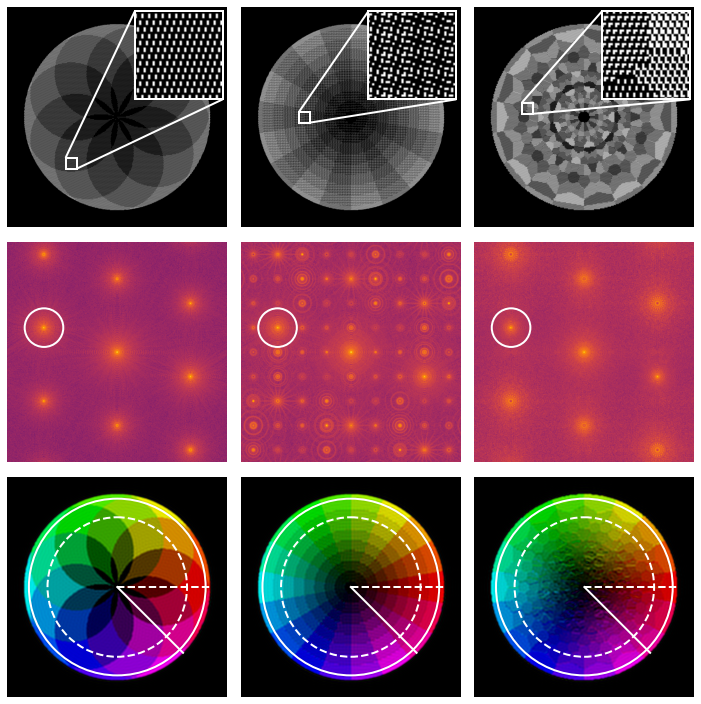

In [149]:
angs = [0,np.pi/4]
rads = np.array([0.75,0.95]) 

titles = ['Parallel Lee', 'Orthogonal Lee', 'Super pixel']
zpos_list = [[0.29,0.71],[0.29,0.5],[0.24,0.46]]

fig, axs = plt.subplots(3,3, figsize=(10,10))
for i in range(len(holo_list)):
    axs[0,i].set_title(titles[i])
    plot_holoWzoom(holo_list[i],ax=axs[0,i], rz=0.025,xyzoom=zpos_list[i])
    plot_four(ft_holos[i], ax= axs[1,i], ap_loc=nuvec, ap_rad=SA_filter)
    axs[2,i].imshow(colorize(shaped_fields[i]))
    axs[2,i].axis('off')
    
    add_linesNcircs(shaped_fields[i].shape, angs=angs, rads=rads, ax=axs[2,i], sc=sc)

fig.tight_layout()

We can also plot the projection along the circles and lines

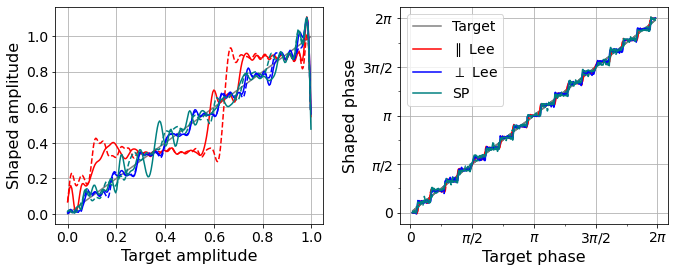

In [150]:
plot_amp_phase_proj(X, Y, vortex_disk, shaped_fields, angs, rads)

### $p_x=4$


First we define the parameters for the holograms

In [151]:
px = 4
nuvec = np.array((1/px,1/px**2)) 
SA_filter = 1.0*np.linalg.norm(nuvec)/6

Then we compute the holograms, note that for the Haskell we first need to compute the LUT

In [152]:
f_val, px_comb, lut = generate_lut('sp', px)

holo_list = [parallel_lee(vortex_disk, nuvec=nuvec), 
                 orthogonal_lee(vortex_disk, nuvec=nuvec), 
                 holo_SP(vortex_disk, lut, px_comb)]

Finally, we compute the shaped fields

In [153]:
shaped_fields = []
ft_holos = []
for ho in holo_list:
    filtered_field, ft_mask = fourier_filter(ho, nuvec, SA_filter, get_ft=True)
    shaped_fields += [filtered_field] 
    ft_holos+= [ft_mask]

Then we plot the results

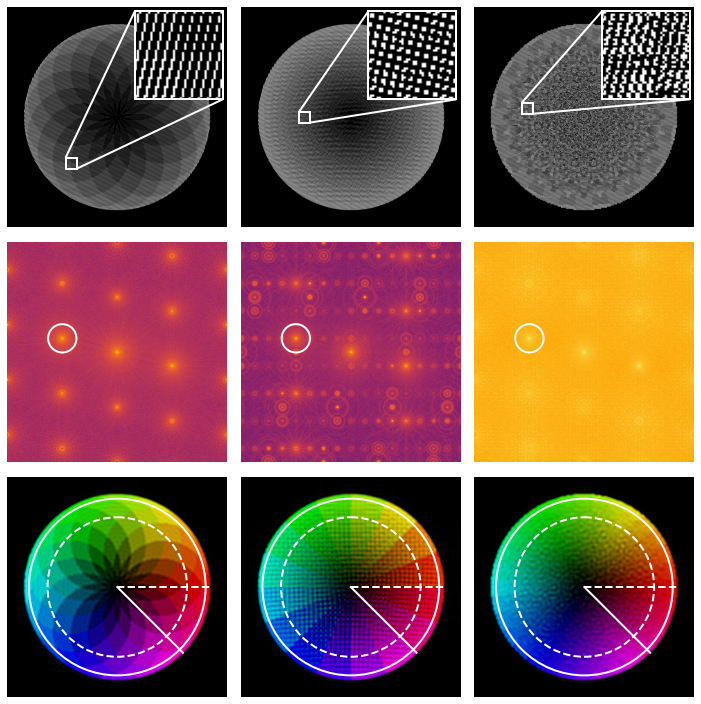

In [154]:
angs = [0,np.pi/4]
rads = np.array([0.75,0.95]) 
titles = ['Parallel Lee', 'Orthogonal Lee', 'Super pixel']
zpos_list = [[0.29,0.71],[0.29,0.5],[0.24,0.46]]

fig, axs = plt.subplots(3,3, figsize=(10,10))
for i in range(len(holo_list)):
    axs[0,i].set_title(titles[i])
    plot_holoWzoom(holo_list[i],ax=axs[0,i], rz=0.025,xyzoom=zpos_list[i])
    plot_four(ft_holos[i], ax= axs[1,i], ap_loc=nuvec, ap_rad=SA_filter)
    axs[2,i].imshow(colorize(shaped_fields[i]))
    axs[2,i].axis('off')
    
    add_linesNcircs(shaped_fields[i].shape, angs=angs, rads=rads, ax=axs[2,i], sc=sc)

fig.tight_layout()

We can also plot the projection along the circles and lines

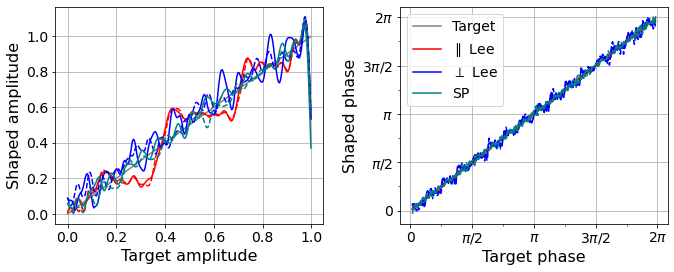

In [155]:
plot_amp_phase_proj(X, Y, vortex_disk, shaped_fields, angs, rads)